Model Summary:
                            OLS Regression Results                            
Dep. Variable:     political_interest   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     78.54
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           5.23e-23
Time:                        15:50:19   Log-Likelihood:                -156.44
No. Observations:                  58   AIC:                             324.9
Df Residuals:                      52   BIC:                             337.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

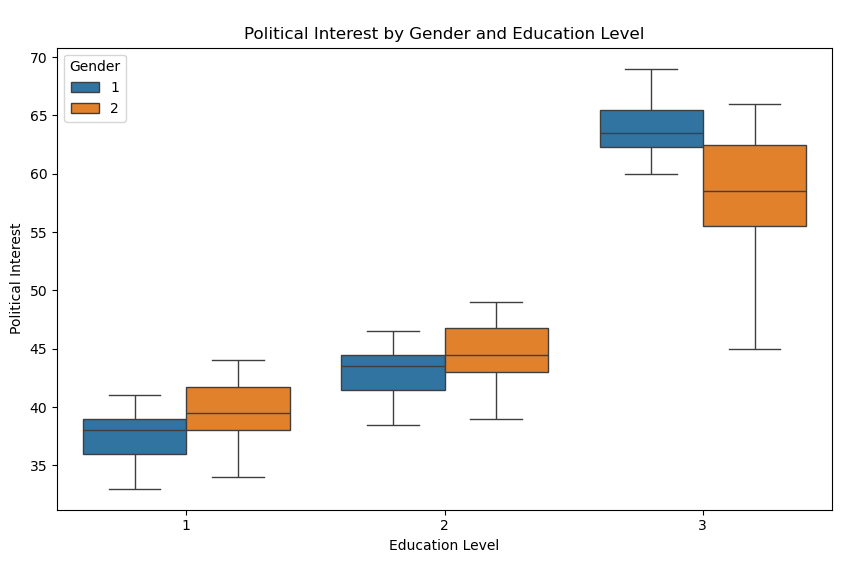

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\edtech3\Documents\Samson\Political Interest.csv")

# Clean data
df_cleaned = df.dropna()

# Convert categorical variables to 'category' dtype
df_cleaned['gender'] = df_cleaned['gender'].astype('category')
df_cleaned['education_level'] = df_cleaned['education_level'].astype('category')

# Define and fit the model
model = ols('political_interest ~ C(gender) * C(education_level)', data=df_cleaned).fit()

# Model summary
print("Model Summary:")
print(model.summary())

# Conducting a Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)

# Analyzing Results
interaction_pvalue = anova_table.loc['C(gender):C(education_level)', 'PR(>F)']
if interaction_pvalue < 0.05:
    print("\nReject the null hypothesis: There is a significant interaction effect between Gender and Education Level on Political Interest.")
else:
    print("\nFail to reject the null hypothesis: No significant interaction effect between Gender and Education Level on Political Interest.")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_level', y='political_interest', hue='gender', data=df_cleaned)
plt.title('\nPolitical Interest by Gender and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Political Interest')
plt.legend(title='Gender')
plt.show()
